In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

# 데이터 준비

In [2]:
# csv 파일 불러오기
df = pd.read_csv("./data/auto-mpg.csv", header = None)
df.columns = ["mpg",
             "cylinders",
             "displacement",
             "horsepower",
             "weight",
             "acceleration",
             "model_year",
             "origin",
             "name"]

# 데이터 탐색

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
# horsepower 전처리 - 누락 데이터("?") 삭제
df["horsepower"].replace("?", np.nan, inplace = True) # "?"를 np.nan으로 변경
df.dropna(subset = ["horsepower"], axis = 0, inplace = True) # 누락데이터 행을 삭제
df["horsepower"] = df["horsepower"].astype("float64") # 문자열을 실수형으로 변환

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


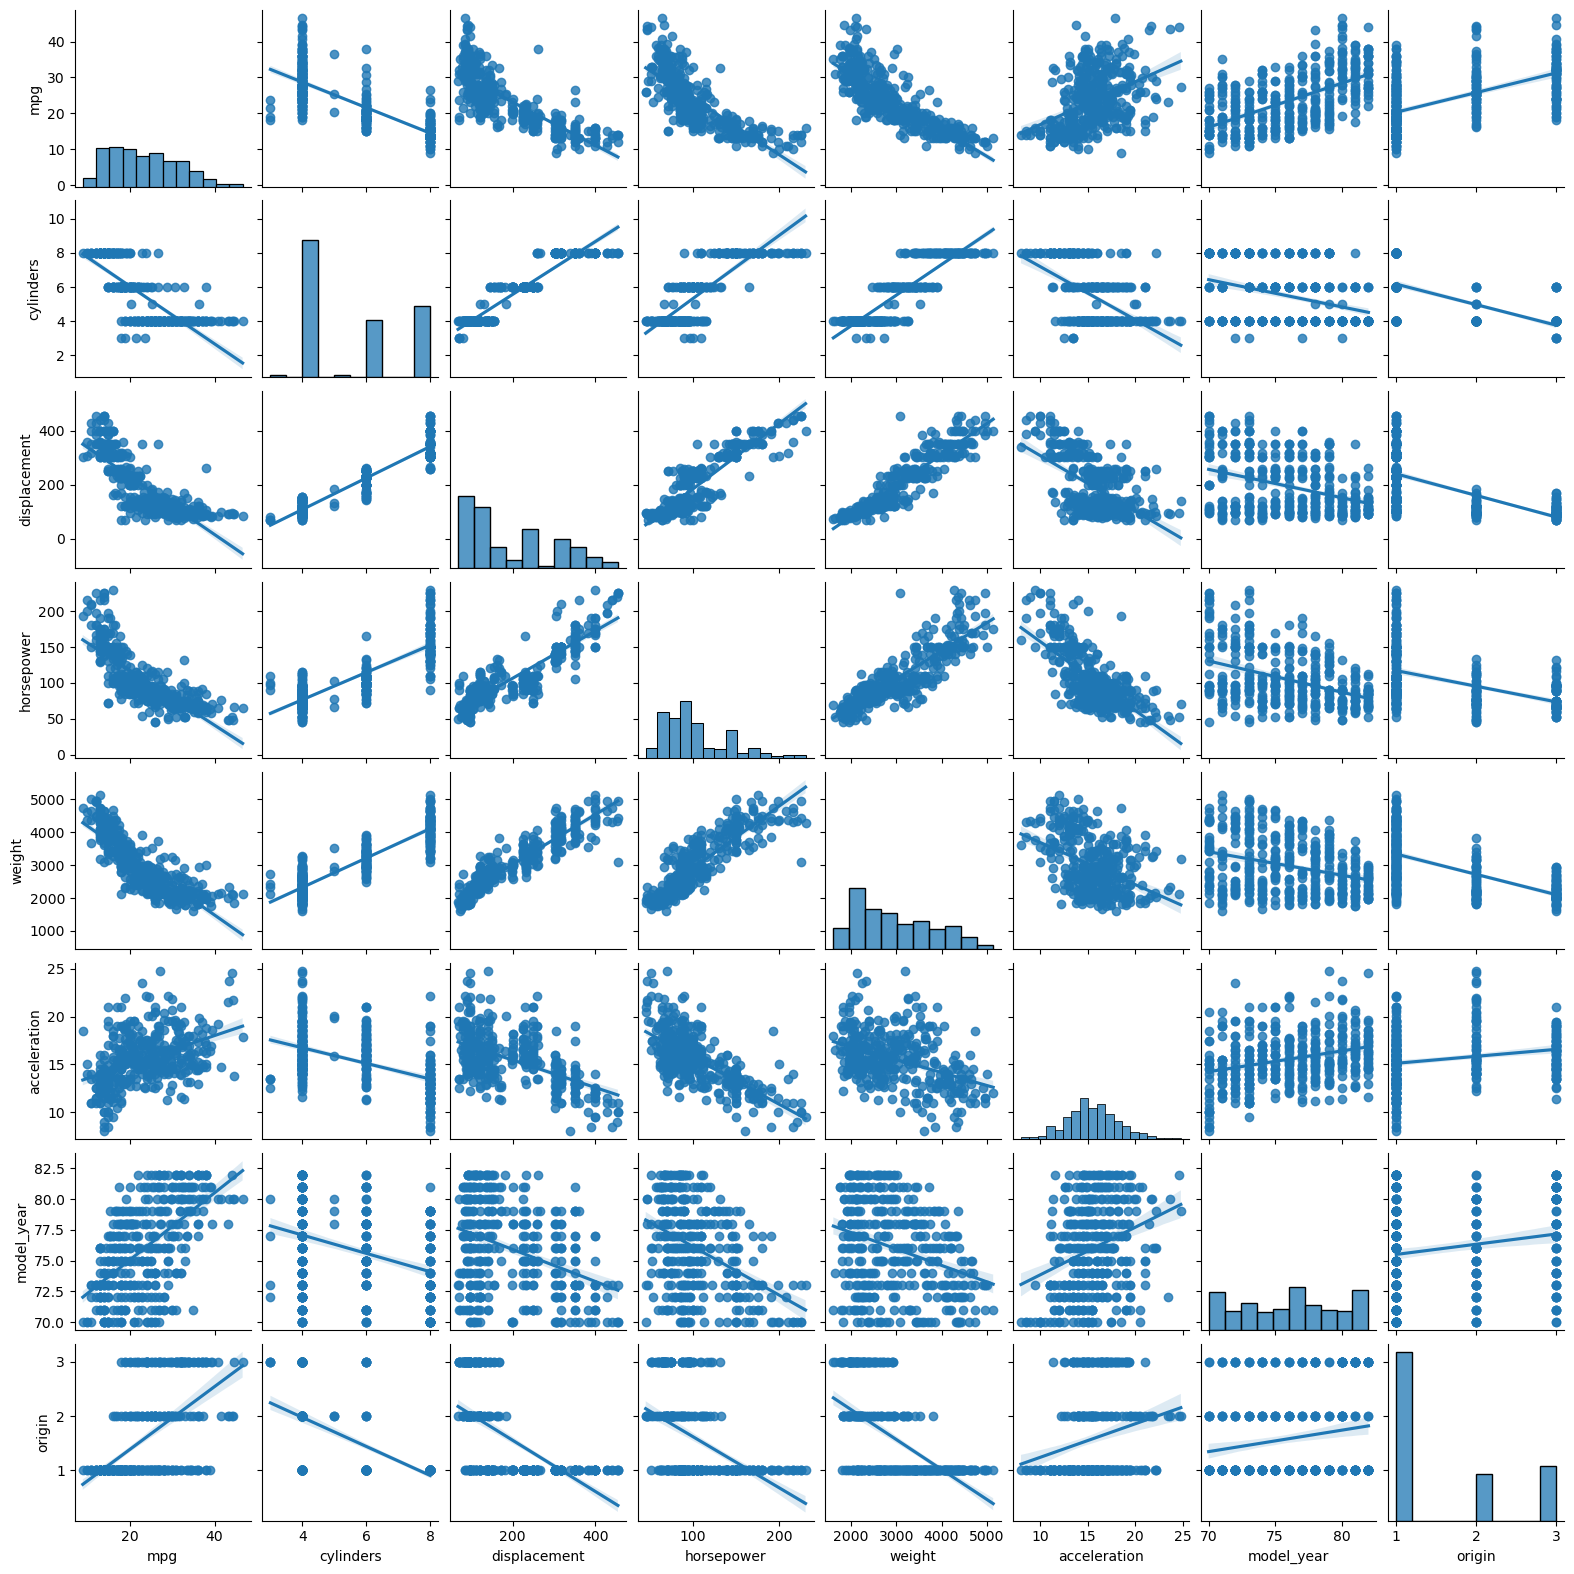

In [9]:
sns.pairplot(df.drop("name", axis = 1), kind='reg', height = 2)

# 변수 선택

In [70]:
df[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


In [71]:
df = df[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]]

In [72]:
# 분석에 활용할 열 선택(연비, 실린더, 출력, 중량)
ndf = df[["mpg", "cylinders", "horsepower", "weight"]]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


In [73]:
ndf.describe()

,mpg,cylinders,horsepower,weight
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184
std,7.805007,1.705783,38.491160,849.402560
min,9.000000,3.000000,46.000000,1613.000000
25%,17.000000,4.000000,75.000000,2225.250000
50%,22.750000,4.000000,93.500000,2803.500000
75%,29.000000,8.000000,126.000000,3614.750000
max,46.600000,8.000000,230.000000,5140.000000


# 데이터셋 분할

In [74]:
x = ndf.drop("mpg", axis = 1) # 독립변수 x1, x2, x3
y = ndf[["mpg"]] # 종속변수 y

In [158]:
# train data와 test data 분할(75 : 25)
x_train, x_test, y_train, y_test = train_test_split(x, # 독립변수
                                                    y, # 종속변수
                                                    test_size = 0.25,
                                                    random_state = 42)

In [159]:
print(len(x_train), len(x_test))

294 98


# 선형회귀 모델링

In [160]:
# 선형회귀 모델 객체 생성
lr = LinearRegression()

In [161]:
# train data로 모델 학습
lr.fit(x_train, y_train) 

LinearRegression()

# 모델 해석 및 평가

In [162]:
# 결정계수(R제곱)
r_square = lr.score(x_test, y_test)
r_square

0.6665078165344003

In [163]:
# 회귀식의 기울기
lr.coef_

array([[-0.48393016, -0.04665027, -0.0052239 ]])

In [164]:
# 회귀식의 y절편
lr.intercept_

array([46.73719335])

In [165]:
# 모형에 x_test를 입력하여 예측한 값을 실제 값과 비교
y_pred = lr.predict(x_test)

In [166]:
mse = mean_squared_error(y_test, y_pred, squared = True)
mse # 그냥 돌려볼 때 쓰세용 ~

16.819048721516697

In [167]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
rmse # 어디가서 발표할 때 써먹으세용 ~

4.101103354161743

In [168]:
pd.DataFrame({"ans" : y_test["mpg"], "pred" : y_pred.flatten()})

,ans,pred
79,26.0,30.147495
276,21.6,24.835902
248,36.1,32.599443
56,26.0,31.323237
393,27.0,26.214879
...,...,...
370,31.0,27.384667
252,19.2,20.468861
211,16.5,18.280297
76,18.0,24.254955


# 모델 평가 시각화

### 예측값과 정답값 비교 산점도

- 모델의 예측이 실제값과 얼마나 밀접하게 일치하는지 평가
- 완벽한 모델은 모든 점이 대각선 위에 놓여 있는 것

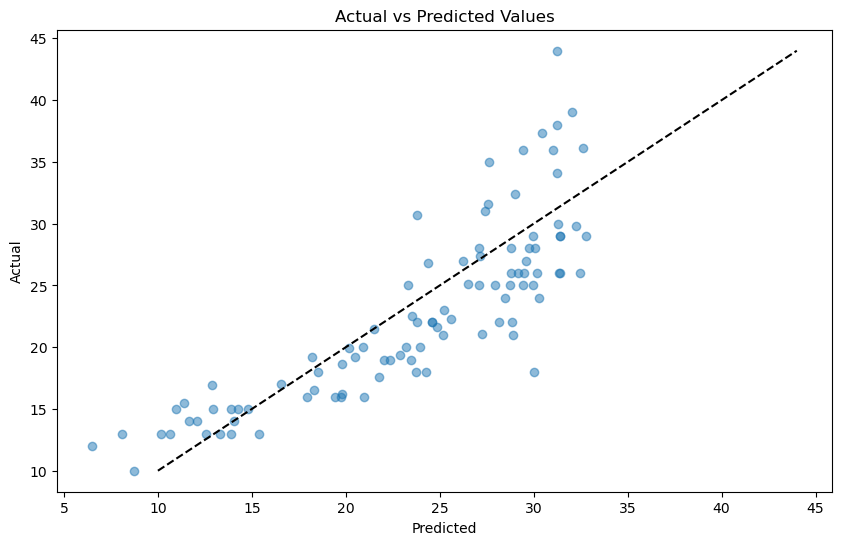

In [169]:
plt.figure(figsize = (10, 6))

plt.scatter(y_pred, y_test, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted Values")
plt.show()

### 잔차도

- 잔차의 패턴을 식별하는 데 도움
- 이상적으로는 잔차가 0 주위에 무작위로 흩어져 있어야 하며, 이는 모델의 오류가 무작위임을 나타냄

In [170]:
# 잔차
residuals = y_test - y_pred

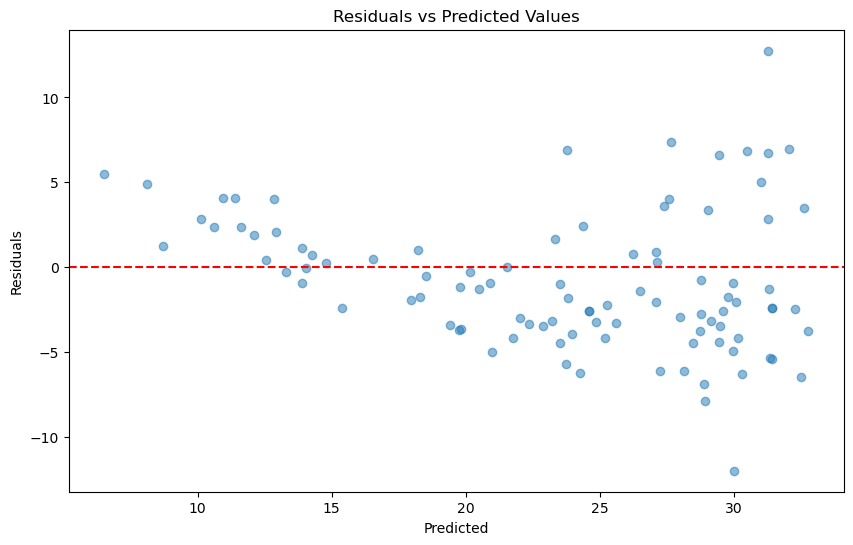

In [171]:
plt.figure(figsize = (10, 6))

plt.scatter(y_pred, residuals, alpha = 0.5)
plt.axhline(y = 0, color = "r", linestyle = "--")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

### QQ plot

- 잔차 분포를 정규 분포와 비교
- 잘 맞는 모델에서는 점들이 대략 대각선을 따라 위치해야 함


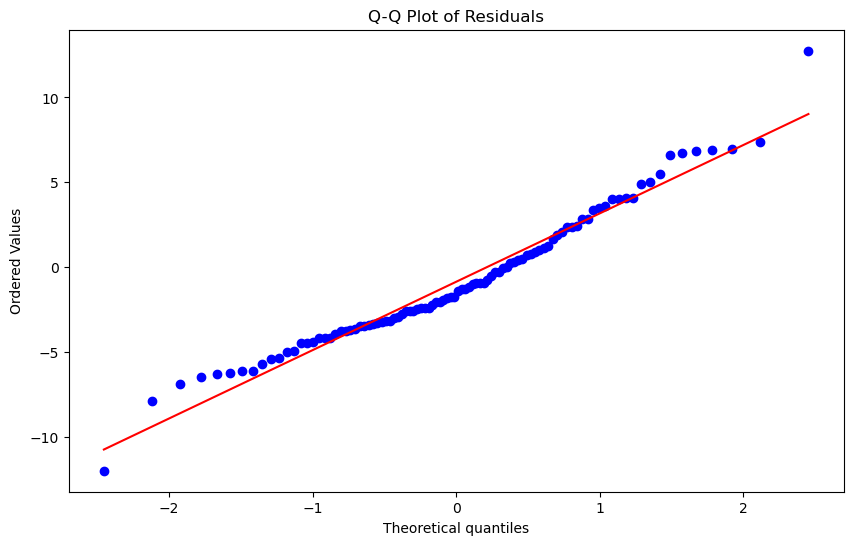

In [172]:
plt.figure(figsize = (10, 6))

stats.probplot(residuals.values.flatten(), dist = "norm", plot = plt)

plt.title("Q-Q Plot of Residuals")
plt.show()

### 잔차 히스토그램

- 잔차 분포에 대한 또 다른 시각을 제공
- 잘 맞는 모델의 경우 0을 중심으로 하는 정규 분포를 볼 수 있음

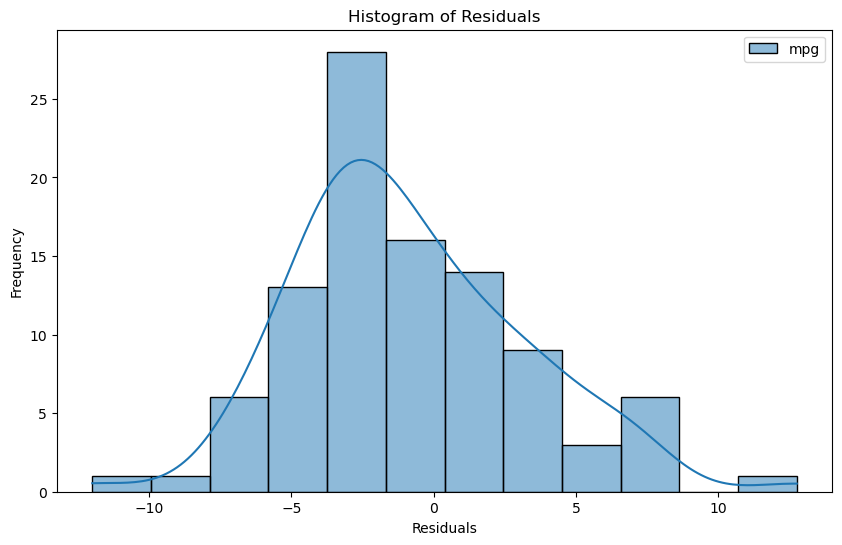

In [173]:
plt.figure(figsize = (10, 6))

sns.histplot(residuals, kde = True)

plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 실습

# x_train = mpg, y_train = horsepower

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df["mpg"], df["horsepower"],
                                                   test_size = 0.25, random_state = 44)
x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1, 1))

# 선형 회귀

In [11]:
lr = LinearRegression()

In [12]:
# 선형회귀 모델 훈련
lr.fit(x_train, y_train) # x_train = mpg, y_train = horsepower

LinearRegression()

In [13]:
lr.predict([[50]])

array([1.59006613])

In [14]:
# 계수(cofficient)/기울기, y절편
print(lr.coef_, lr.intercept_)

[-3.8540973] 194.29493107436932


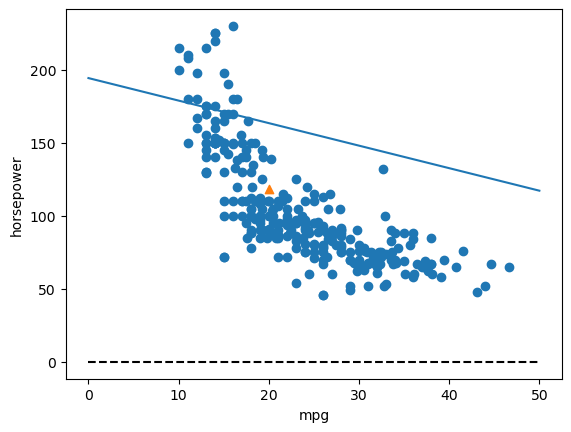

In [15]:
# 훈련 데이터와 회귀선 시각화
plt.figure()

plt.scatter(x_train, y_train) # 훈련데이터 (파랑 점)
plt.plot([0, 50], [lr.intercept_, 20 * lr.coef_[0] + lr.intercept_]) # 회귀선 시각화 0, y절편 / 50, 50*기울기+y절편
plt.plot([0, 50], [0, 0], "k--") # 0,0 부터 50,50 까지 검은색 선 긋기
plt.scatter(20, 118.42, marker = "^") # 50cm 농어에 대한 예측 마크 찍기

plt.xlabel("mpg")
plt.ylabel("horsepower")
plt.show()

# 모델 평가

In [16]:
lr.score(x_test, y_test)

0.6675492841197816

In [17]:
pred = lr.predict(x_test)

In [18]:
mse = mean_squared_error(y_test, pred)
mse

479.0750510003692

# 다항 회귀

In [19]:
df["squared"] = df["mpg"] ** 2

In [20]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,squared
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,324.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,225.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,324.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,256.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,289.0


In [21]:
# 데이터 분할(75 : 25)
x_train, x_test, y_train, y_test = train_test_split(df[["mpg", "squared"]], df["horsepower"],
                                                   test_size = 0.25, random_state = 43)

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train, y_train) # 모델학습

LinearRegression()

In [24]:
lr.score(x_test, y_test) # 모델평가

0.8030793834486695

- 0.58 > 0.76까지 오름

In [25]:
pred = lr.predict(x_test)

In [26]:
mse = mean_squared_error(y_test, pred)
mse

308.50081216478037

In [27]:
lr.predict([[20, 400]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([109.81445937])

In [28]:
# 회귀식
print(lr.coef_, lr.intercept_) 

[-13.30954501   0.18928044] 300.29318310053645


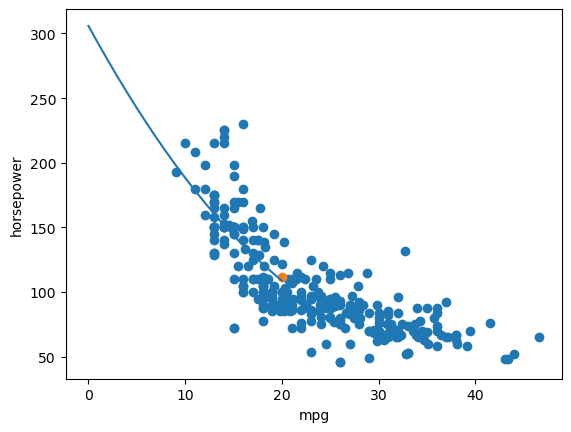

In [29]:
# 다항회귀 시각화
points = np.arange(21)

plt.scatter(x_train["mpg"], y_train) # 훈련데이터 (파랑 점)
plt.plot(points, -13.65 * points + points**2 * 0.19 + 305.84) # 회귀선 그려주기 / x*기울기, y절편 ...
plt.scatter(20, 111.76) # 50cm 농어에 대한 예측 마크 찍기

plt.xlabel("mpg")
plt.ylabel("horsepower")
plt.show()

# x_train = mpg, y_train = acceleration

# 선형 회귀

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df["mpg"], df["acceleration"],
                                                   test_size = 0.25, random_state = 43)
x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1, 1))

In [31]:
lr = LinearRegression()

In [32]:
# 선형회귀 모델 훈련
lr.fit(x_train, y_train) # x_train = mpg, y_train = acceleration

LinearRegression()

In [33]:
# 20 mpg에 대한 예측
lr.predict([[50]])

array([19.60884007])

In [34]:
# 계수(cofficient)/기울기, y절편
print(lr.coef_, lr.intercept_)

[0.15096602] 12.060538892601935


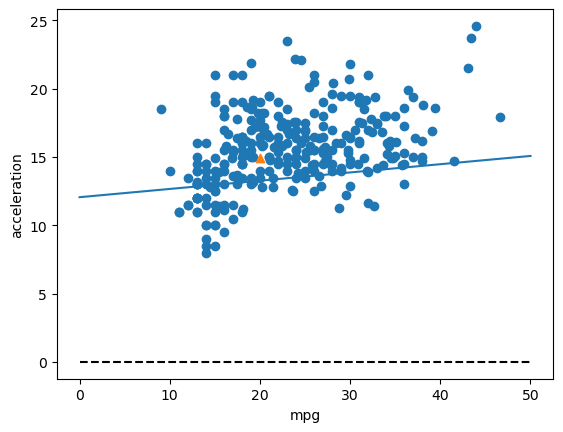

In [35]:
# 훈련 데이터와 회귀선 시각화
plt.figure()

plt.scatter(x_train, y_train) # 훈련데이터 (파랑 점)
plt.plot([0, 50], [lr.intercept_, 20 * lr.coef_[0] + lr.intercept_]) # 회귀선 시각화 0, y절편 / 50, 50*기울기+y절편
plt.plot([0, 50], [0, 0], "k--") # 0,0 부터 50,50 까지 검은색 선 긋기
plt.scatter(20, 14.95, marker = "^") # 50cm 농어에 대한 예측 마크 찍기

plt.xlabel("mpg")
plt.ylabel("acceleration")
plt.show()

# 모델평가

In [36]:
lr.score(x_test, y_test)

0.22124575323632245

In [37]:
pred = lr.predict(x_test)

In [38]:
mse = mean_squared_error(y_test, pred)
mse

5.113996592492988

# 다항회귀

In [39]:
df["squared"] = df["mpg"] ** 2

In [40]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,squared
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,324.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,225.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,324.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,256.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,289.0


In [41]:
# 데이터 분할(75 : 25)
x_train, x_test, y_train, y_test = train_test_split(df[["mpg", "squared"]], df["acceleration"],
                                                   test_size = 0.25, random_state = 43)

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(x_train, y_train) # 모델학습

LinearRegression()

In [44]:
lr.score(x_test, y_test) # 모델평가

0.27018224542801517

- 0.18 > 0.2까지 오름

In [45]:
pred = lr.predict(x_test)

In [46]:
mse = mean_squared_error(y_test, pred)
mse

4.792635835416025

In [47]:
lr.predict([[50, 2500]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.80946407])

In [48]:
# 회귀식
print(lr.coef_, lr.intercept_) 

[ 0.40313372 -0.00502034] 9.20363083653504


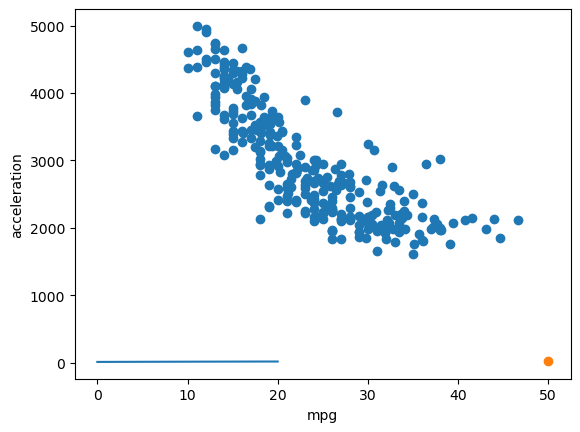

In [69]:
# 다항회귀 시각화
points = np.arange(21)

plt.scatter(x_train["mpg"], y_train) # 훈련데이터 (파랑 점)
plt.plot(points, 0.403 * points + points**2 * -0.005 + 9.203) # 회귀선 그려주기 / x*기울기, y절편 ...
plt.scatter(50, 16.80)

plt.xlabel("mpg")
plt.ylabel("acceleration")
plt.show()

# x_train = mpg, y_train = weight

# 선형 회귀

In [50]:
x_train, x_test, y_train, y_test = train_test_split(df["mpg"], df["weight"],
                                                   test_size = 0.25, random_state = 43)
x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1, 1))

In [51]:
lr = LinearRegression()

In [52]:
# 선형회귀 모델 훈련
lr.fit(x_train, y_train) # x_train = mpg, y_train = acceleration

LinearRegression()

In [53]:
# 20 mpg에 대한 예측
lr.predict([[20]])

array([3260.28868507])

In [54]:
# 계수(cofficient)/기울기, y절편
print(lr.coef_, lr.intercept_)

[-90.36450436] 5067.578772239443


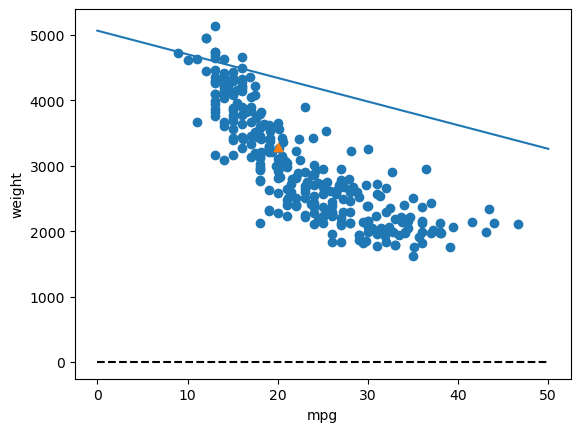

In [55]:
# 훈련 데이터와 회귀선 시각화
plt.figure()

plt.scatter(x_train, y_train) # 훈련데이터 (파랑 점)
plt.plot([0, 50], [lr.intercept_, 20 * lr.coef_[0] + lr.intercept_]) # 회귀선 시각화 0, y절편 / 50, 50*기울기+y절편
plt.plot([0, 50], [0, 0], "k--") # 0,0 부터 50,50 까지 검은색 선 긋기
plt.scatter(20, 3295.41, marker = "^") # 50cm 농어에 대한 예측 마크 찍기

plt.xlabel("mpg")
plt.ylabel("weight")
plt.show()

# 모델 평가

In [56]:
lr.score(x_test, y_test)

0.7066858391341512

In [57]:
pred = lr.predict(x_test)

In [58]:
mse = mean_squared_error(y_test, pred)
mse

235719.9403478528

# 다항 회귀

In [59]:
df["squared"] = df["mpg"] ** 2

In [60]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,squared
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,324.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,225.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,324.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,256.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,289.0


In [61]:
# 데이터 분할(75 : 25)
x_train, x_test, y_train, y_test = train_test_split(df[["mpg", "squared"]], df["weight"],
                                                   test_size = 0.25, random_state = 44)

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(x_train, y_train) # 모델학습

LinearRegression()

In [64]:
lr.score(x_test, y_test) # 모델평가

0.8292945971652366

- 0.7 > 0.82까지 오름

In [65]:
pred = lr.predict(x_test)
mse = mean_squared_error(y_test, pred)
mse

133154.0845526457

In [66]:
lr.predict([[20, 400]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3107.8065341])

In [67]:
# 회귀식
print(lr.coef_, lr.intercept_) 

[-291.67527687    4.01269663] 7336.2334181938195


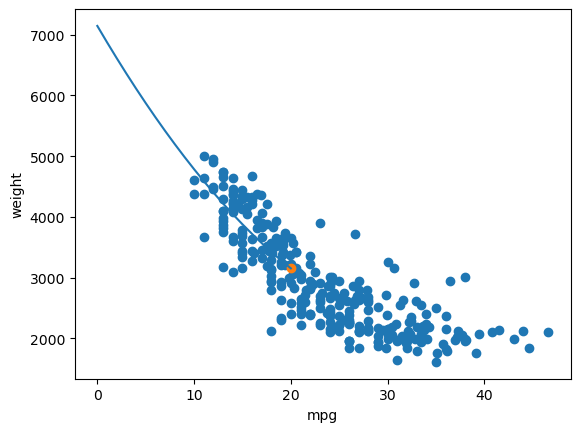

In [68]:
# 다항회귀 시각화
points = np.arange(21)

plt.scatter(x_train["mpg"], y_train) # 훈련데이터 (파랑 점)
plt.plot(points, -272.15* points + points**2 * 3.63 + 7143.93) # 회귀선 그려주기 / x*기울기, y절편 ...
plt.scatter(20, 3156.71)

plt.xlabel("mpg")
plt.ylabel("weight")
plt.show()